In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [ ]:
df=pd.read_excel("/content/ClaimDetailsnew.xlsx")
df

,ClaimNumber,LossDate,PolicyNumber,PolicyEntryDate,PolicyExpirationDate,ClaimLossDesc,ClaimStatus,Examiner,ClaimLOB,InsuredName,...,YearBuilt,Stories,Comments,ConstructionTypeDesc,FormattedAddress,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,2003862,2019-04-18 00:00:00.000,5010232,2019-05-03 08:09:04.880,2019-07-01 00:00:00.000,back up causing sewage water in from the drain...,Closed,rgibson,BOP Property,"ETHERIDGE OWNERS, INC.",...,1965,8,ClassCode:65146,MasonryNonCombustible,"3114 WISCONSIN AVENUE, NW\n\rWASHINGTON, DC 20016",20016,7626.78,4758237.0,30800,5090954
1,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
2,2004989,2020-01-01 00:00:00.000,7146314,2020-01-02 09:54:03.083,2020-05-04 00:00:00.000,Fire in the kitchen.,Closed,rgibson,BOP Property,"H W Owens, Inc",...,1969,2,ClassCode:65132,JoistedMasonry,"4000-4062 Tangle Drive\n\rRichmond, VA 23228",23228,17492.12,5042916.0,30480,2560320
3,2005666,2020-04-30 00:00:00.000,7120072,2020-05-15 12:29:16.837,2020-10-10 00:00:00.000,Façade sign was torn from the building and han...,Closed,ahart,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,3009.98,3640000.0,35000,5426100
4,2006935,2021-01-27 00:00:00.000,7120072,2021-02-12 13:24:24.330,2021-10-10 00:00:00.000,Fire damage to the building,Closed,rgibson,BOP Property,"RLGVS, LLC",...,2012,1,ClassCode:59999,MasonryNonCombustible,"1 NEWBERRY PARKWAY\n\rETTERS, PA 17319",17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
203,2011122,2023-03-03 00:00:00.000,7228908,2023-09-26 08:18:36.867,2023-12-05 00:00:00.000,high wind and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6480-6478 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,4617938.0,24440,3666000
204,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000
205,2011123,2023-03-03 00:00:00.000,7228908,2023-09-26 08:26:02.633,2023-12-05 00:00:00.000,high winds and rain caused roof damage.,Open,ssexton,BOP Property,"PLK Communities, LLC; ETAL",...,1950,1,ClassCode:65146,Frame,"6458 Cheviot Road\n\rCincinnati, OH 45247",45247,NaN,2231296.8,11280,1692000


**Data cleaning/Preprocessing**

In [ ]:
#keep only selected columns
selected_columns = ['Jurisdiction', 'CoverageType', 'Deductible', 'Limit', 'InjuryCause',
                    'YearBuilt', 'Stories', 'Comments', 'ConstructionTypeDesc', 'ZipCode', 'LossAmount',
                    'E2Value', 'SquareFootage', 'BuildingLimit']

df = df[selected_columns]
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,Comments,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,ClassCode:65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,ClassCode:65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,ClassCode:59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,ClassCode:59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,ClassCode:65146,Frame,45247,NaN,2231296.8,11280,1692000


In [ ]:
#change col name as classcode & keep only classcode value
df['Comments'] = df['Comments'].str.replace('ClassCode:', '')
df = df.rename(columns={'Comments': 'ClassCode'})
df

<ipython-input-112-3549490ee878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].str.replace('ClassCode:', '')


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [ ]:
#remove - from zipcode value
df["ZipCode"] = df["ZipCode"].str.replace("-", "")
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.0,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.0,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.0,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.0,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 3666000.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
203,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,4617938.0,24440,3666000
204,Ohio,BOP-Building,FixedDollar - 25000.00,Standard - 1692000.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000
205,Ohio,BOP-Building,FixedDollar - 25000.00,Blanket Group 1 Blanket - 67934187.00,WIND,1950,1,65146,Frame,45247,NaN,2231296.8,11280,1692000


In [ ]:
#remove null value from LossAmount
df = df[pd.to_numeric(df['LossAmount'], errors='coerce').notna()]
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [ ]:
def extract_amount(value):
    match = re.search(r'(\d+\.\d+)', str(value))
    if match:
        return float(match.group(1))
    else:
        return None


In [ ]:

df['LossAmount'] = df['LossAmount'].apply(extract_amount)
df = df.dropna(subset=['LossAmount'])
df


<ipython-input-116-5b722fd25d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LossAmount'] = df['LossAmount'].apply(extract_amount)


,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000


In [ ]:
# in limit and deductible column, separate the alphabetical and numeric value in two separate columns



df['LossAmount'].fillna(0, inplace=True)
# df['Deductible'] = df['Deductible'].str.extract(r'(\d+\.\d+)').astype(float)
# df['Limit'] = df['Limit'].str.extract(r'(\d+\.\d+)').astype(float)
df['limit_type'] = df['Limit'].str.extract(r'([a-zA-Z]+)')
df['Limit_val'] = df['Limit'].str.extract(r'(\d+)')
df['Deductible_type'] = df['Deductible'].str.extract(r'([a-zA-Z]+)')
df['Deductible_val'] = df['Deductible'].str.extract(r'(\d+)')
df



,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500


In [ ]:
# df['YearGap'] = 	2023 - df['YearBuilt']
from datetime import datetime
df['YearGap'] = datetime.now().year - df['YearBuilt']
df

,Jurisdiction,CoverageType,Deductible,Limit,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Dist. of Columbia,BOP-Building,FixedDollar - 2500.00,Standard - 550637568.00,WATER,1965,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500,58
1,Virginia,BOP-Building,FixedDollar - 5000.00,Standard - 2560320.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000,54
2,Virginia,BOP-Building,FixedDollar - 5000.00,Blanket Group 1 Blanket - 35156468.00,FIRE,1969,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000,54
3,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 704688296.00,WIND,2012,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500,11
4,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 732875728.00,FIRE,2012,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,FixedDollar - 1000.00,Standard - 362389.00,VEHICLES,1879,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000,144
181,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
182,North Carolina,BOP-Building,FixedDollar - 1000.00,Standard - 133125.00,WIND,1986,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
183,Pennsylvania,BOP-Building,FixedDollar - 2500.00,Standard - 701500.00,FIRE,1954,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500,69


In [ ]:

df=df.drop(columns=["Limit", "Deductible", "YearBuilt"])
df



,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,Dist. of Columbia,BOP-Building,WATER,8,65146,MasonryNonCombustible,20016,7626.78,4758237.00,30800,5090954,Standard,550637568,FixedDollar,2500,58
1,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Standard,2560320,FixedDollar,5000,54
2,Virginia,BOP-Building,FIRE,2,65132,JoistedMasonry,23228,17492.12,5042916.00,30480,2560320,Blanket,1,FixedDollar,5000,54
3,Pennsylvania,BOP-Building,WIND,1,59999,MasonryNonCombustible,17319,3009.98,3640000.00,35000,5426100,Standard,704688296,FixedDollar,2500,11
4,Pennsylvania,BOP-Building,FIRE,1,59999,MasonryNonCombustible,17319,48695.03,3640000.00,35000,5426100,Standard,732875728,FixedDollar,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Pennsylvania,BOP-Building,VEHICLES,2,65141,Frame,44086,1710.00,339996.00,1954,362389,Standard,362389,FixedDollar,1000,144
181,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,76107.69,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
182,North Carolina,BOP-Building,WIND,1,65141,Frame,27601,4269.09,147168.00,1008,133125,Standard,133125,FixedDollar,1000,37
183,Pennsylvania,BOP-Building,FIRE,2,65144,Frame,19401,14320.07,474599.00,4040,610000,Standard,701500,FixedDollar,2500,69


In [ ]:
#convert the categorical column into numeric col
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col_list = ["Jurisdiction", "CoverageType", "InjuryCause", "ClassCode", "ConstructionTypeDesc","ZipCode","limit_type","Deductible_type"]
for col in col_list:
    df[col]= label_encoder.fit_transform(df[col])
df



,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568,0,2500,58
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320,0,5000,54
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1,0,5000,54
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296,0,2500,11
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389,0,1000,144
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125,0,1000,37
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125,0,1000,37
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500,0,2500,69


In [ ]:
columns_to_string = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type',
                    'Deductible_type']
df[columns_to_string] = df[columns_to_string].astype(str)
columns_to_int = ['Stories', 'Deductible_val']
df.fillna(0, inplace=True)
df[columns_to_int] = df[columns_to_int].astype('int')
df['Limit_val'] = df['Limit_val'].astype('double')
#df['YearBuilt'] = df['YearBuilt'].astype('double')
df

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,1710.00,339996.00,1954,362389,1,362389.0,0,1000,144
181,3,0,8,1,8,0,66,76107.69,147168.00,1008,133125,1,133125.0,0,1000,37
182,3,0,8,1,8,0,66,4269.09,147168.00,1008,133125,1,133125.0,0,1000,37
183,5,0,1,2,10,0,53,14320.07,474599.00,4040,610000,1,701500.0,0,2500,69


In [ ]:
num_additional_rows = 190

additional_rows = df.sample(n=num_additional_rows, replace=True, random_state=42)

additional_rows.reset_index(drop=True, inplace=True)

df_extended = pd.concat([df, additional_rows], ignore_index=True)
print(f" {df_extended.shape}")

 (316, 16)


In [ ]:
df_extended

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,LossAmount,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,7626.78,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,2,7,1,65,17492.12,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,1,4,2,34,3009.98,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,1,4,2,34,48695.03,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,5,0,5,2,8,1,6,3175.00,896231.52,4104,896231,1,896231.0,0,2500,63
312,5,0,7,4,14,0,36,350.00,3895202.50,10000,1500000,1,1500000.0,0,2500,123
313,4,0,1,1,4,1,76,4898.45,1038508.80,6720,930000,1,930000.0,0,2500,57
314,1,0,7,3,16,0,61,2781.20,848000.00,4000,848000,1,848000.0,1,2500,1


In [ ]:
feature_data_types = df.dtypes
feature_data_types

Jurisdiction             object
CoverageType             object
InjuryCause              object
Stories                   int64
ClassCode                object
ConstructionTypeDesc     object
ZipCode                  object
LossAmount              float64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type               object
Limit_val               float64
Deductible_type          object
Deductible_val            int64
YearGap                   int64
dtype: object

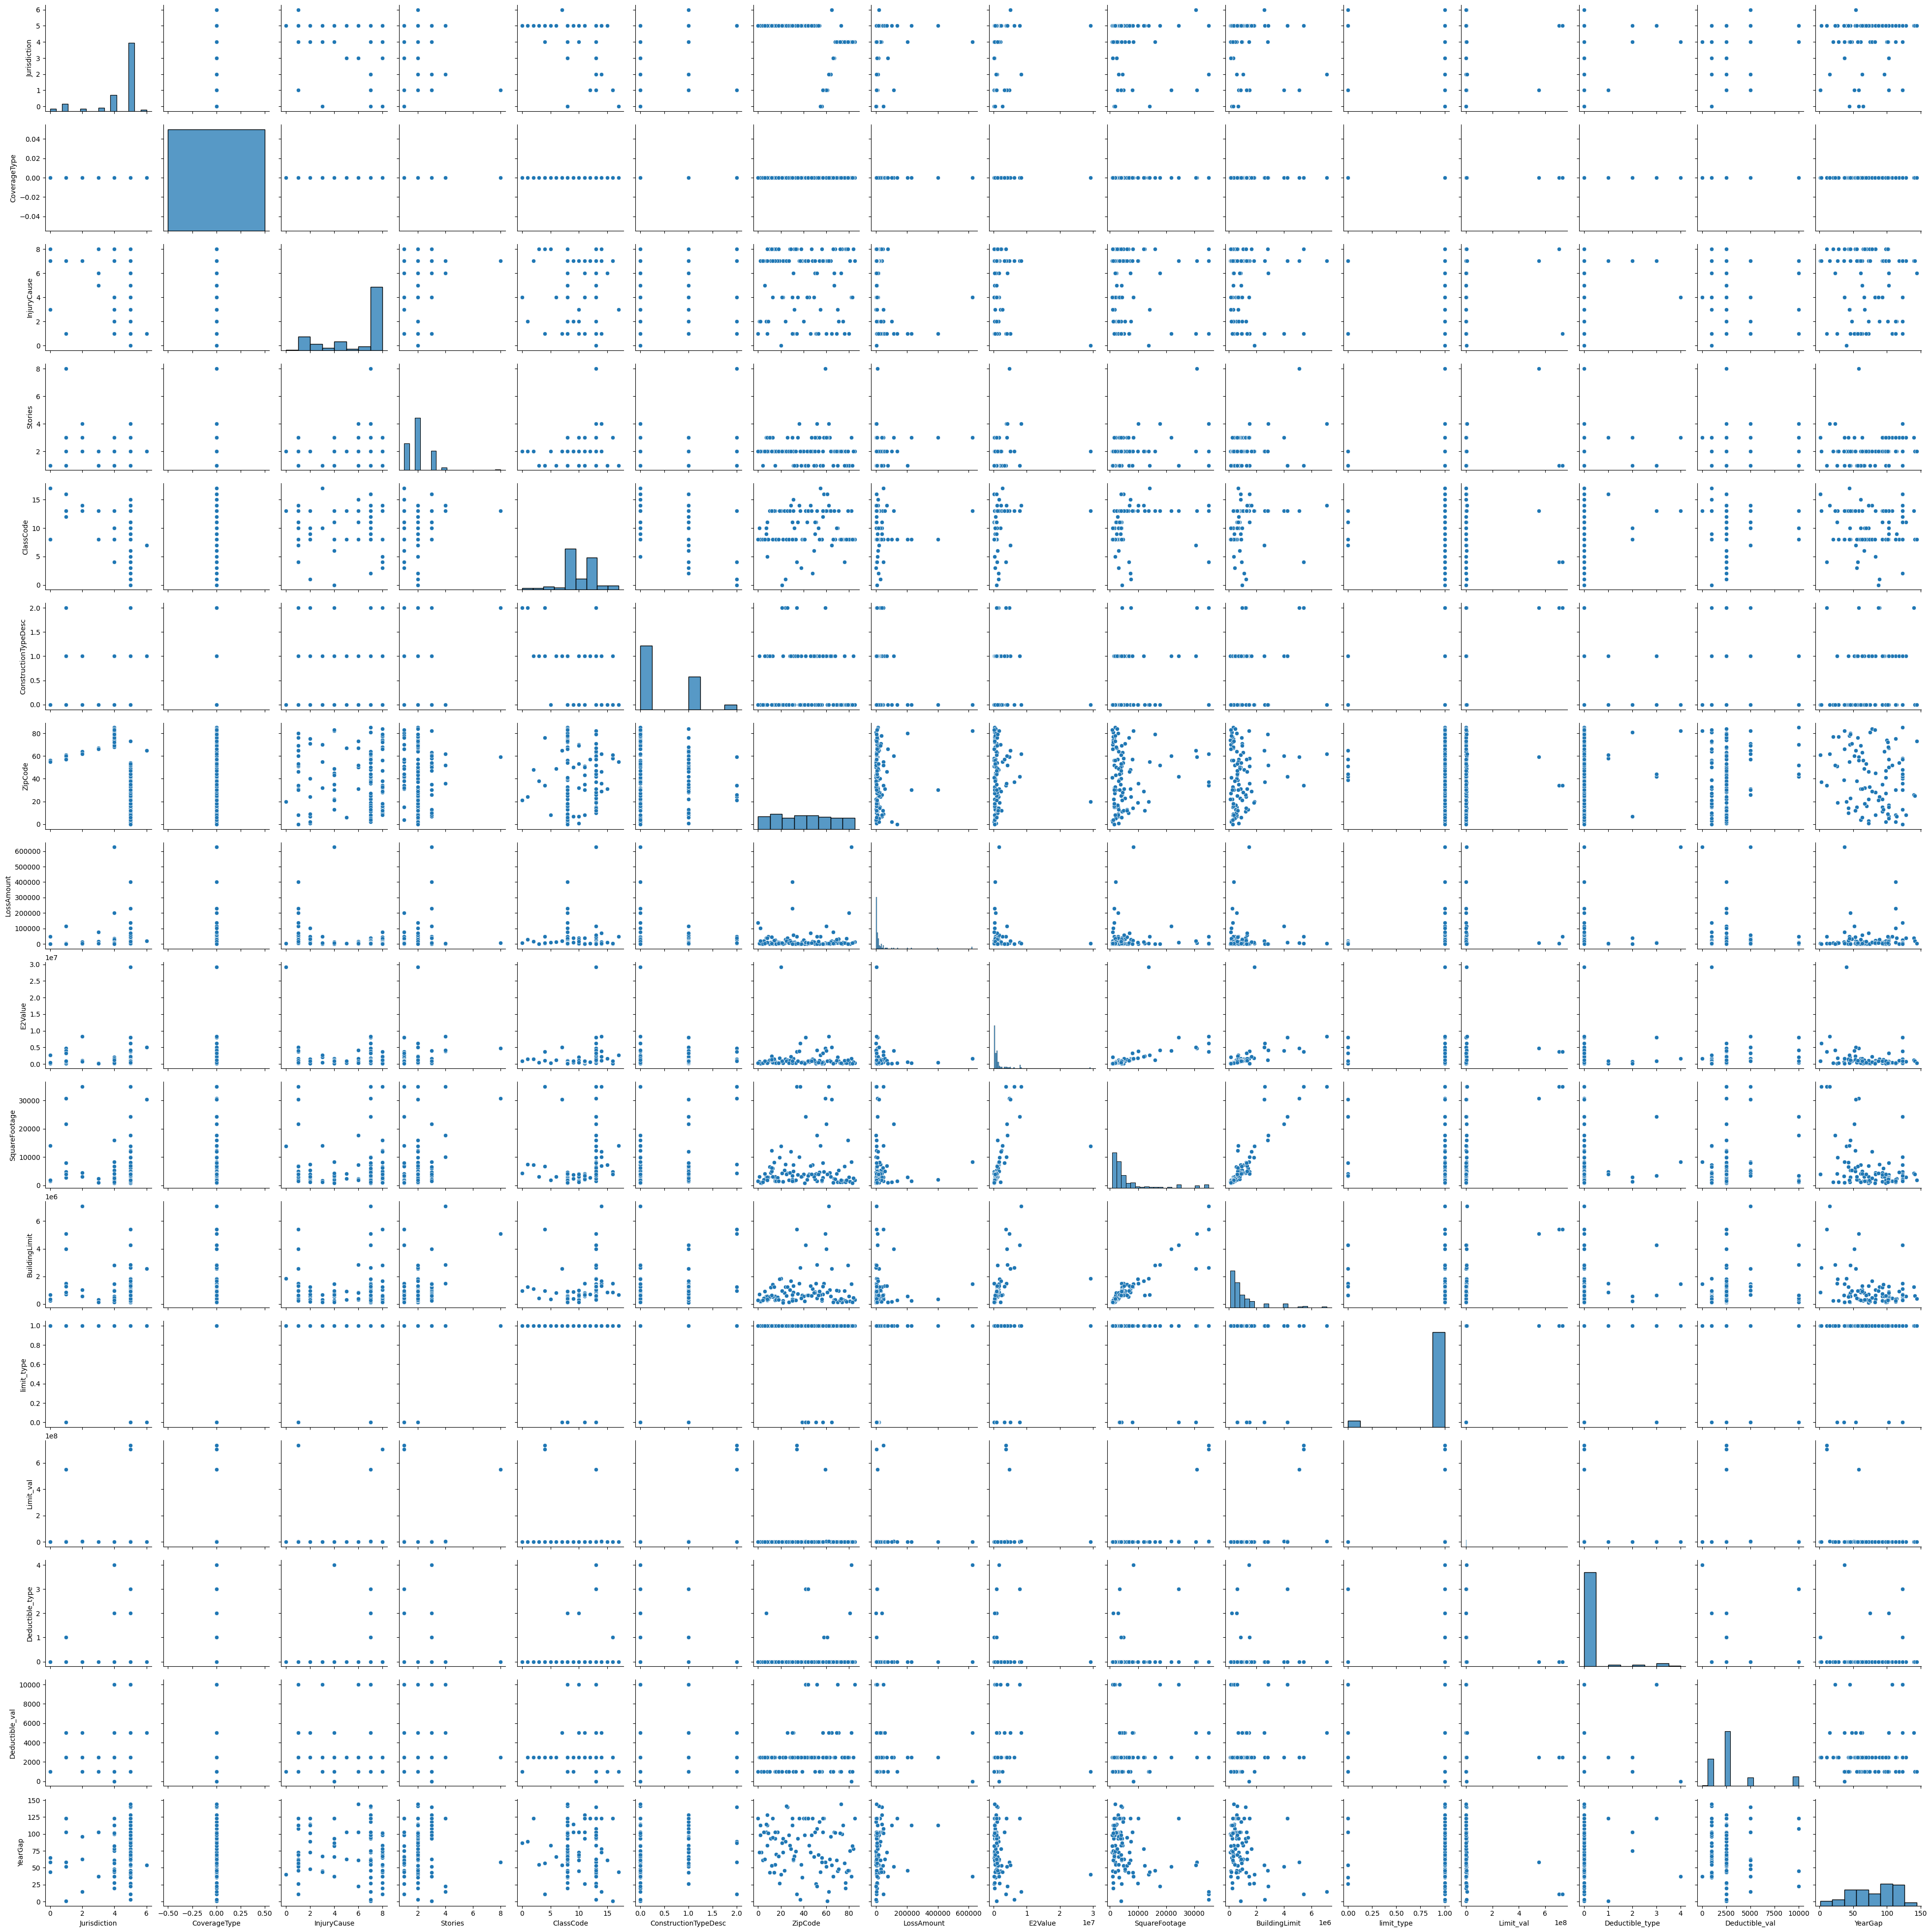

In [ ]:
df_numeric = df.apply(pd.to_numeric, errors='ignore')
numerical_columns = df_numeric.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_numeric[numerical_columns])
plt.show()

In [ ]:
column_names = ["InjuryCause", "ConstructionTypeDesc", "ZipCode"]
value_counts_dict = {}

for column in column_names:
    value_counts_dict[column] = df[column].value_counts()

print(value_counts_dict)

{'InjuryCause': 7    51
8    28
1    17
4    11
2     8
6     5
3     3
5     2
0     1
Name: InjuryCause, dtype: int64, 'ConstructionTypeDesc': 0    79
1    41
2     6
Name: ConstructionTypeDesc, dtype: int64, 'ZipCode': 42    4
44    4
8     3
18    3
30    3
     ..
10    1
28    1
14    1
74    1
79    1
Name: ZipCode, Length: 86, dtype: int64}


<ipython-input-26-41af28bf9523>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LossAmount)


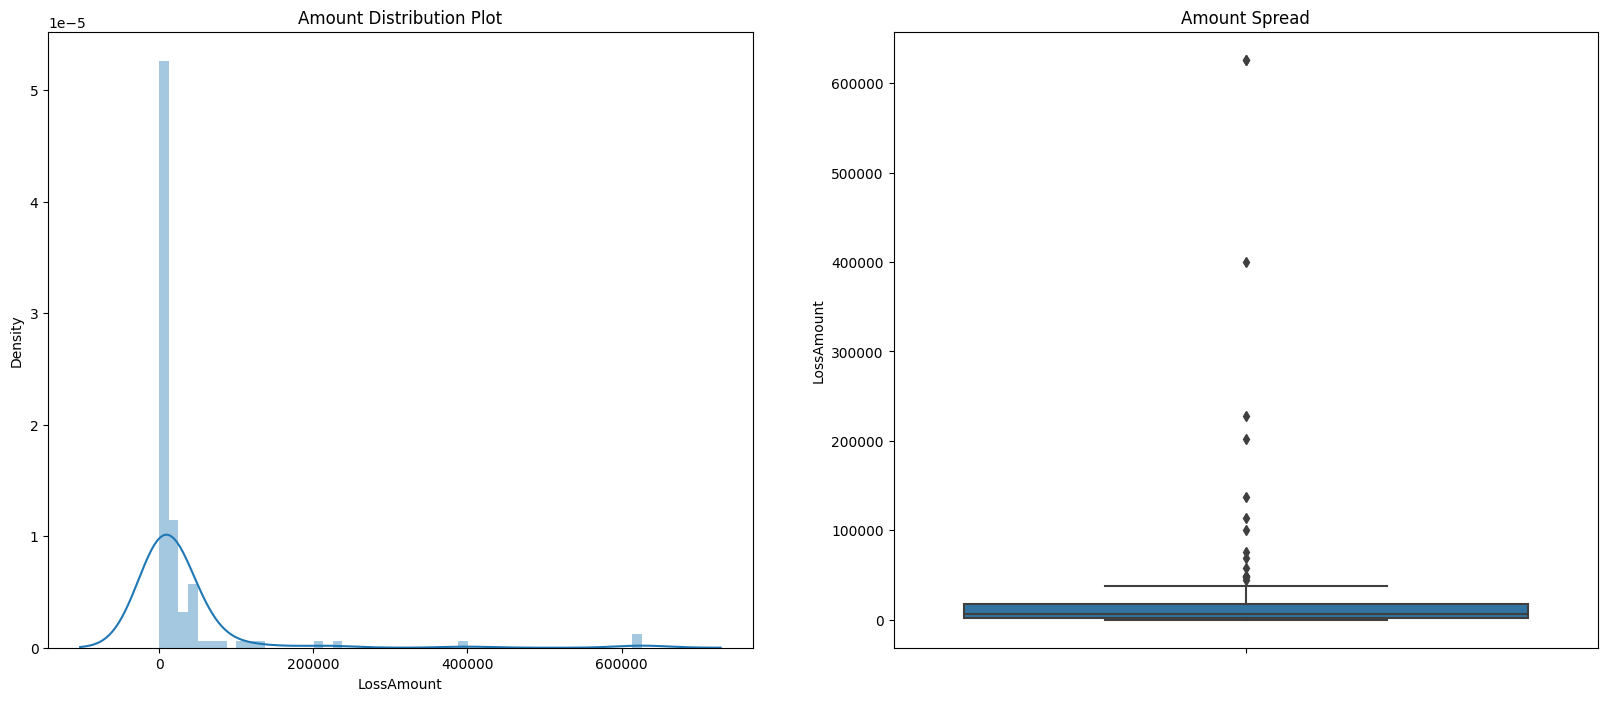

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Amount Distribution Plot')
sns.distplot(df.LossAmount)
plt.subplot(1,2,2)
plt.title('Amount Spread')
sns.boxplot(y=df.LossAmount)
plt.show()

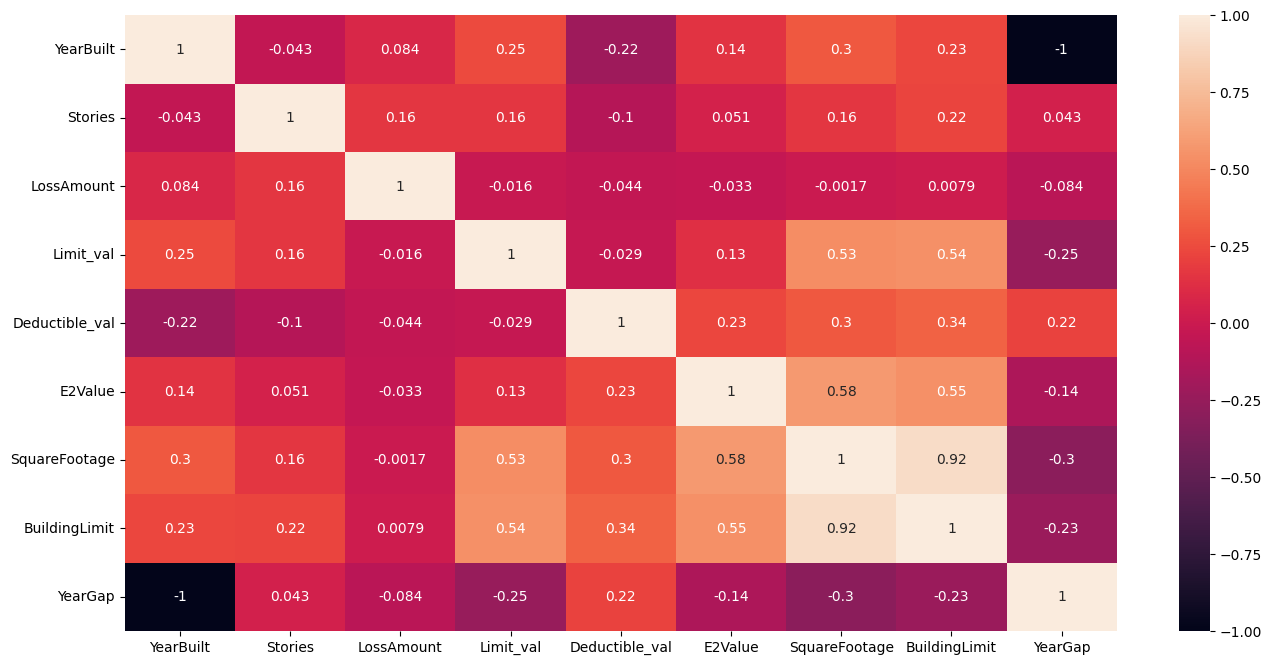

In [ ]:
corr_df = df[['YearBuilt', 'Stories', 'LossAmount', 'Limit_val', 'Deductible_val','E2Value',	'SquareFootage',	'BuildingLimit',	'YearGap']]
plt.figure(figsize=(16,8))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

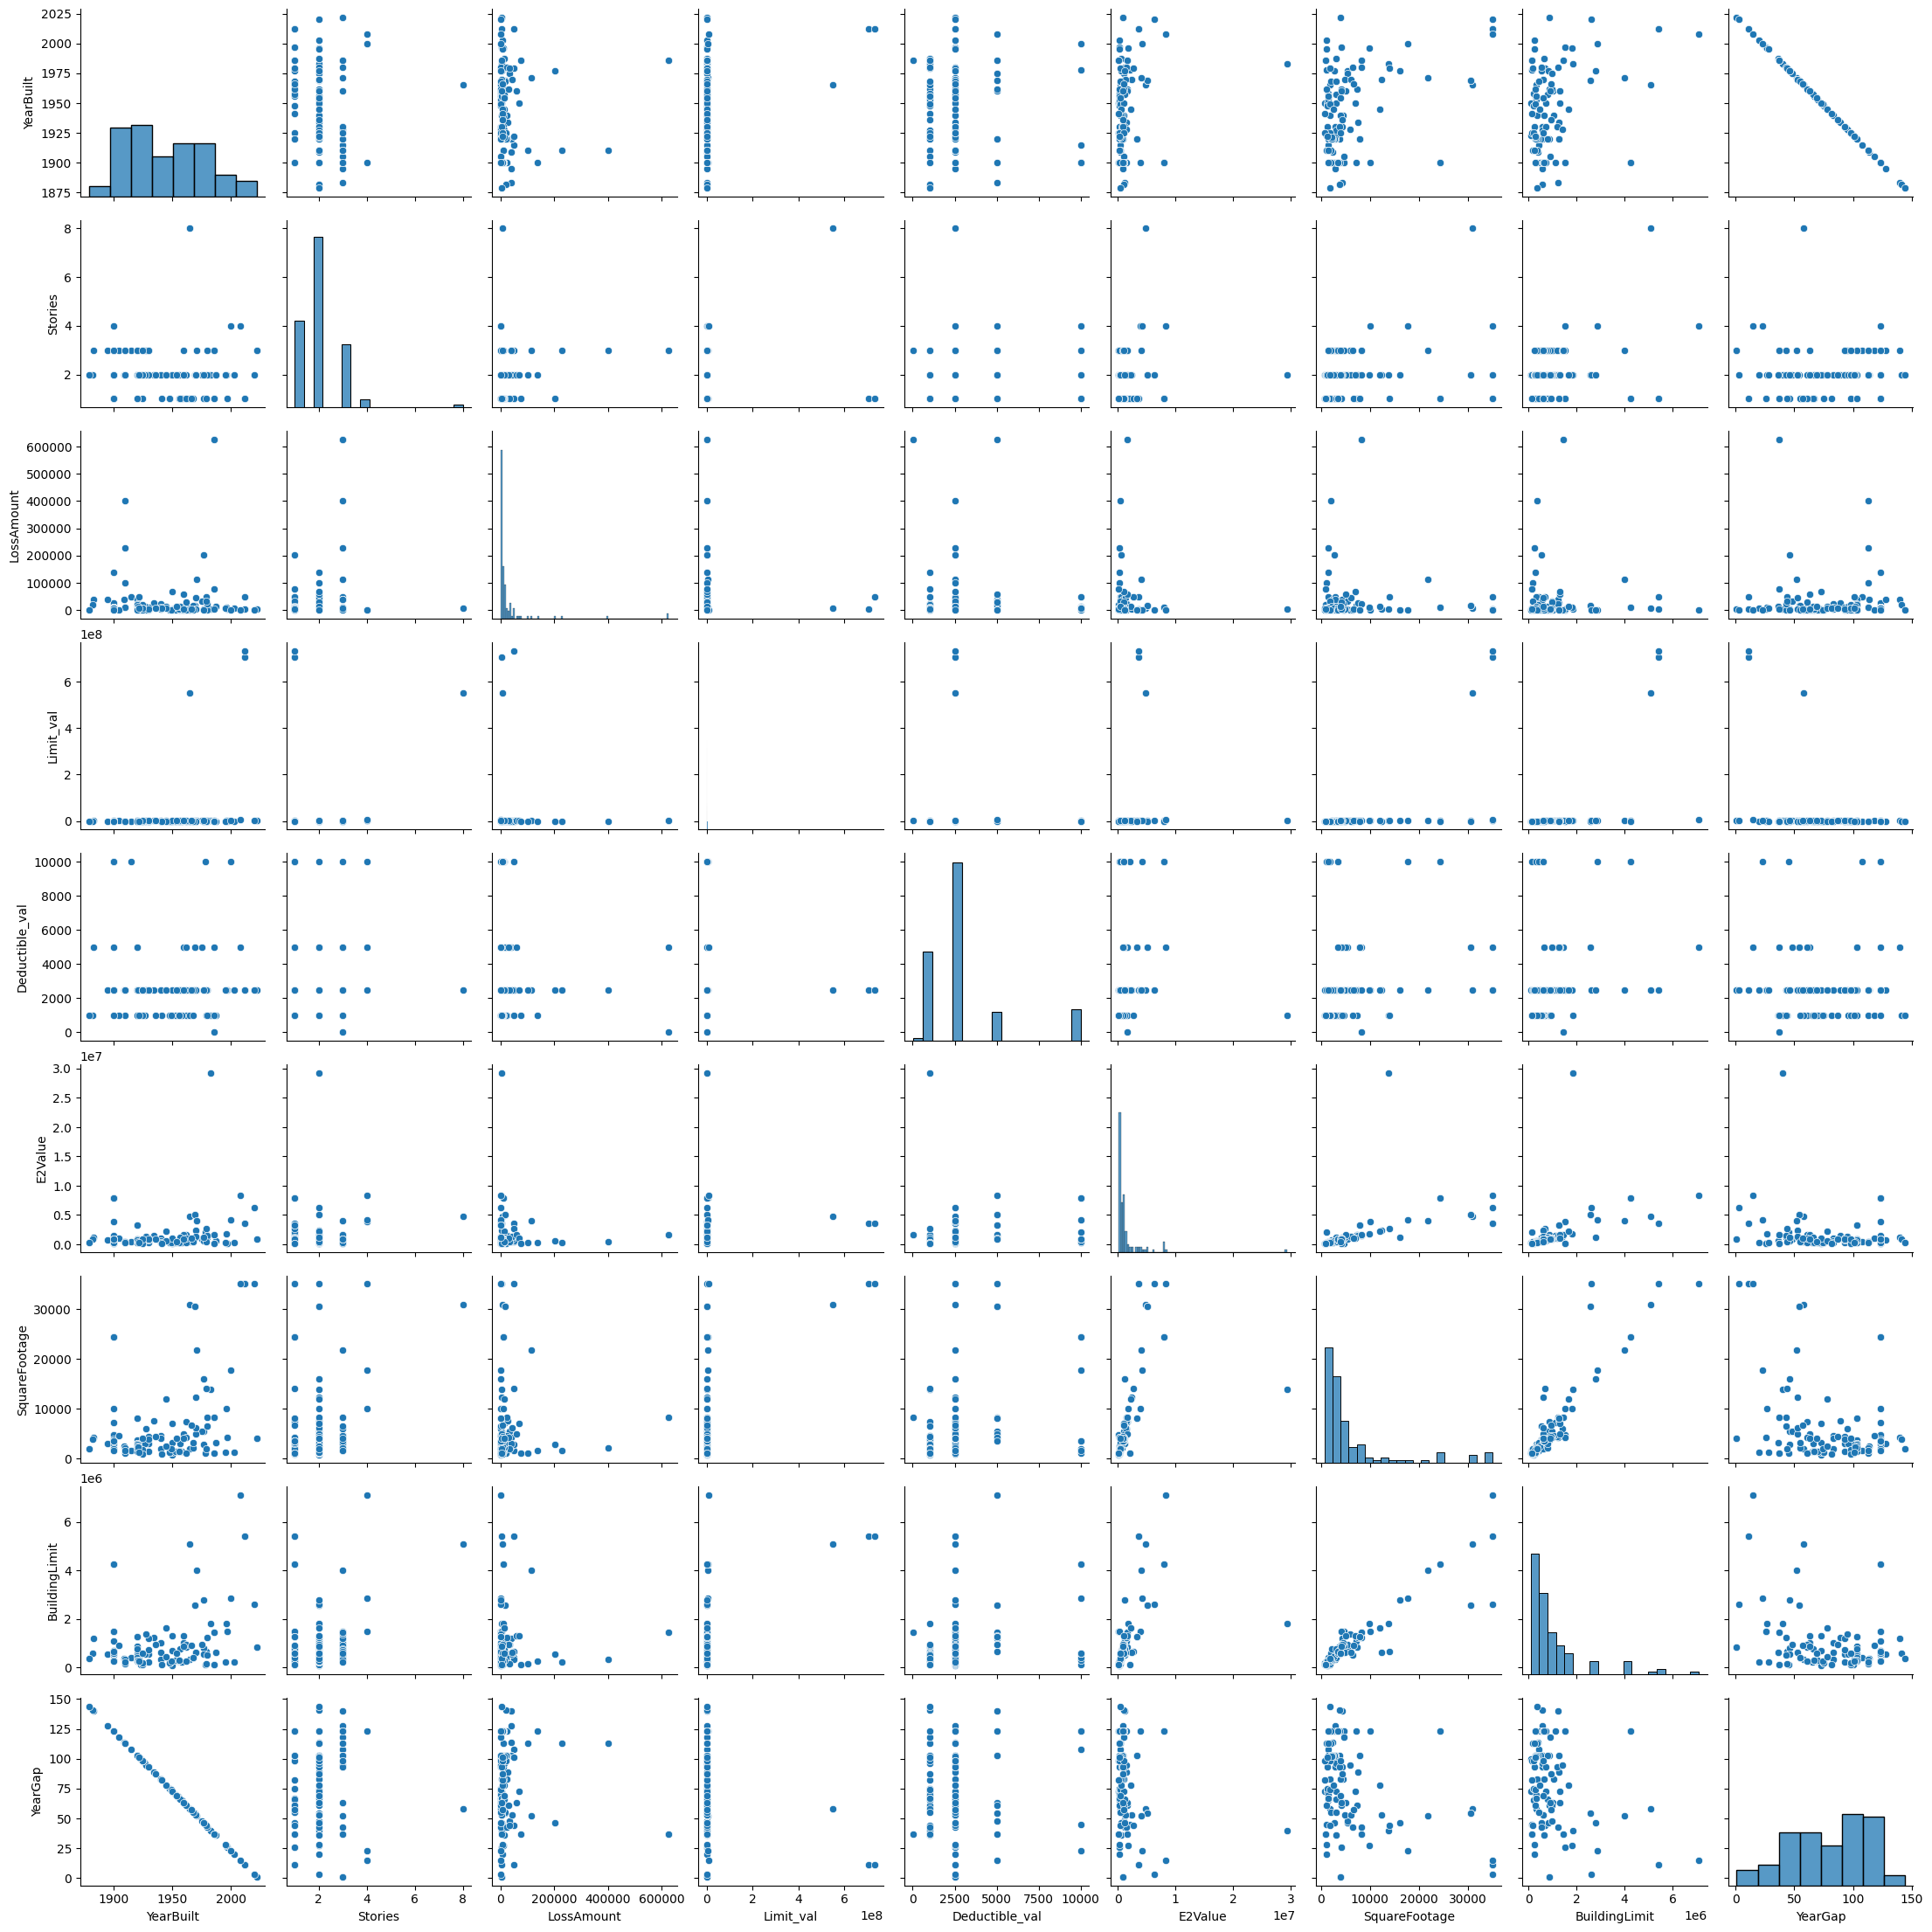

In [ ]:
sns.pairplot(df[numerical_columns])
plt.show()

**Data splitting -scaling**

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop(columns=["LossAmount"])
y = df["LossAmount"]

In [ ]:
X

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,2,7,1,65,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,2,7,1,65,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,1,4,2,34,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,1,4,2,34,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5,0,6,2,8,0,73,339996.00,1954,362389,1,362389.0,0,1000,144
181,3,0,8,1,8,0,66,147168.00,1008,133125,1,133125.0,0,1000,37
182,3,0,8,1,8,0,66,147168.00,1008,133125,1,133125.0,0,1000,37
183,5,0,1,2,10,0,53,474599.00,4040,610000,1,701500.0,0,2500,69


In [ ]:
y

0       7626.78
1      17492.12
2      17492.12
3       3009.98
4      48695.03
         ...   
172     1710.00
181    76107.69
182     4269.09
183    14320.07
190     1250.00
Name: LossAmount, Length: 126, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [ ]:
X_train

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
92,4,0,8,2,8,0,74,218400.00,1120,109200,1,109200.0,0,2500,100
13,5,0,0,2,13,0,20,29266185.60,13800,1831631,1,1831631.0,0,1000,40
156,5,0,7,1,13,0,44,955986.00,3489,610526,0,1.0,0,10000,123
183,5,0,1,2,10,0,53,474599.00,4040,610000,1,701500.0,0,2500,69
38,5,0,1,1,11,1,51,202400.00,4176,1500000,1,1500000.0,0,2500,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,5,0,7,1,13,1,42,7937675.85,24353,4261720,0,1.0,0,10000,123
15,5,0,3,1,10,1,32,406800.00,1620,305000,1,305000.0,0,2500,67
118,5,0,8,2,8,1,33,355200.00,1920,265187,1,265187.0,0,1000,74
66,5,0,7,2,8,0,17,491680.00,2800,480564,1,480564.0,0,1000,103


In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_train[columns_to_convert] = X_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_train.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X_test[columns_to_convert] = X_test[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X_test.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(df.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
LossAmount              float64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [ ]:
X1 = df_extended.drop(columns=["LossAmount"])
y1 = df_extended["LossAmount"]

In [ ]:
X1

,Jurisdiction,CoverageType,InjuryCause,Stories,ClassCode,ConstructionTypeDesc,ZipCode,E2Value,SquareFootage,BuildingLimit,limit_type,Limit_val,Deductible_type,Deductible_val,YearGap
0,1,0,7,8,13,2,59,4758237.00,30800,5090954,1,550637568.0,0,2500,58
1,6,0,1,2,7,1,65,5042916.00,30480,2560320,1,2560320.0,0,5000,54
2,6,0,1,2,7,1,65,5042916.00,30480,2560320,0,1.0,0,5000,54
3,5,0,8,1,4,2,34,3640000.00,35000,5426100,1,704688296.0,0,2500,11
4,5,0,1,1,4,2,34,3640000.00,35000,5426100,1,732875728.0,0,2500,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,5,0,5,2,8,1,6,896231.52,4104,896231,1,896231.0,0,2500,63
312,5,0,7,4,14,0,36,3895202.50,10000,1500000,1,1500000.0,0,2500,123
313,4,0,1,1,4,1,76,1038508.80,6720,930000,1,930000.0,0,2500,57
314,1,0,7,3,16,0,61,848000.00,4000,848000,1,848000.0,1,2500,1


In [ ]:
y1

0       7626.78
1      17492.12
2      17492.12
3       3009.98
4      48695.03
         ...   
311     3175.00
312      350.00
313     4898.45
314     2781.20
315     1278.25
Name: LossAmount, Length: 316, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X1_train[columns_to_convert] = X1_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X1_train.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


In [ ]:
columns_to_convert = ['Jurisdiction', 'CoverageType', 'InjuryCause', 'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type', 'Deductible_type']

# Convert object columns to numeric
X1_test[columns_to_convert] = X1_test[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(X1_test.dtypes)

Jurisdiction              int64
CoverageType              int64
InjuryCause               int64
Stories                   int64
ClassCode                 int64
ConstructionTypeDesc      int64
ZipCode                   int64
E2Value                 float64
SquareFootage             int64
BuildingLimit             int64
limit_type                int64
Limit_val               float64
Deductible_type           int64
Deductible_val            int64
YearGap                   int64
dtype: object


**Linear Regrassion**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

109328.47856753327

In [ ]:
R2= r2_score(y_test, y_pred)
R2

0.15908492663953633

In [ ]:
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

113261.89105441804

In [ ]:
R2= r2_score(y1_test, y1_pred)
R2

0.12339848473258219

**LightGBM**

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [ ]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
}

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
model = lgb.train(params, train_data, valid_sets=[test_data])
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

array([51170.26307088,  5917.36434737,  9930.12653381, 15122.0930918 ,
       11298.3406977 , 16878.8780018 , 64516.94253306,  8974.60946639,
        4901.62700552, 15122.0930918 , 53569.73264346, 61002.20195521,
       71709.13612193,  6981.72342888, 16878.8780018 ,  6031.79400701,
       44962.63856917,  7198.06186981, 70473.16920975, 12642.71475062,
       22941.54273082, 10590.48718073, 62715.92903172,  5421.26754929,
       53762.3961054 , 19343.34642354])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

114018.03417530045

In [ ]:
R2= r2_score(y_test, y_pred)
R2

0.08539699026327108

In [ ]:
train_data = lgb.Dataset(X1_train, label=y1_train)
test_data = lgb.Dataset(X1_test, label=y1_test, reference=train_data)

In [ ]:
model = lgb.train(params, train_data, valid_sets=[test_data])
y1_pred = model.predict(X1_test, num_iteration=model.best_iteration)
y1_pred

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

array([ 4.58580912e+02,  4.82782026e+04, -1.75410568e+03,  9.22823001e+03,
        7.20283053e+02,  4.73352890e+03,  2.89064878e+03,  1.60962085e+03,
        2.01145313e+05,  8.90633486e+03,  6.11657273e+02,  2.12267803e+03,
        1.19556560e+03,  6.11657273e+02,  3.64379903e+03, -6.16031539e+03,
        1.37617401e+05,  1.31322466e+04,  2.01145313e+05, -4.41378252e+04,
       -6.16031539e+03,  6.01747250e+05,  3.93803493e+03,  5.78761308e+03,
        2.90231941e+04,  6.21842952e+03, -8.42089598e+04,  9.22823001e+03,
        5.50206596e+05,  1.76034031e+04,  6.21842952e+03,  5.83732735e+04,
        9.85098471e+04,  5.83732735e+04,  2.12267803e+03,  1.99569443e+04,
        1.84132771e+03,  1.23568605e+03,  8.74064645e+02,  4.78399265e+03,
        1.23568605e+03,  6.19935660e+04,  4.21364350e+03,  9.22823001e+03,
        3.81763308e+04,  3.81763308e+04,  6.05976310e+03,  1.77786141e+04,
        3.99666177e+05,  4.89020083e+04, -2.50645562e+04,  2.47542545e+03,
        1.42086959e+04,  

In [ ]:
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
rmse

21586.488366883437

In [ ]:
R2= r2_score(y1_test, y1_pred)
R2

0.9681581276857694

**Catboost**

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)
y_pred

array([ 29025.55959966,  22268.9875415 ,  21167.4673812 ,  20641.21253779,
        22027.83707602,  21861.40445995,  33869.08744255,  22083.29211091,
        22692.00446708,  20103.39944088,  25806.0610062 ,  37282.67386683,
        34989.13132664,  20888.63702116,  21861.40445995,  21505.32534593,
        26642.50879499,  21160.85870069,  51733.59598644,  22116.43761447,
        24812.22509496,  21253.51739104, 120231.04315843,  22208.73346073,
        28712.71629453,  21059.18529027])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

101418.64220229253

In [ ]:
R2=r2_score(y_test, y_pred)
R2

0.2763624206852239

In [ ]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X1_train, y1_train)
y1_pred = cbr.predict(X1_test)
y1_pred

array([ 14924.99268071,  40679.07084665,  16302.01146363,  16216.65481931,
        24480.79122717,  16555.84998524,  15397.71960572,  14654.23682069,
        56792.52897126,  16417.73554737,  15058.61245684,  17314.29939846,
        16051.45529734,  15601.16738737,  16355.38951898,  16447.70665761,
        56816.93273683,  18475.64705978,  56792.52897126,  16143.99654811,
        16447.70665761, 155623.3878038 ,  18093.51677599,  24393.66089063,
        27165.93507872,  16467.63128452,  15935.40534138,  16216.65481931,
       132639.63110815,  17069.09944045,  16467.63128452,  24189.12978708,
        35519.66255372,  24189.12978708,  17314.29939846,  15807.96435158,
        19175.05454093,  15968.35043173,  16776.06884658,  15852.59435126,
        15968.35043173,  24594.64566214,  16355.56118973,  16216.65481931,
        17024.00567387,  16947.96358676,  16937.60549787,  22395.40106356,
       119414.30334716,  24148.68274728,  14896.64427328,  19462.50402035,
        27569.16206674,  

In [ ]:
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

97913.9630824674

In [ ]:
R2=r2_score(y1_test, y1_pred)
R2

0.3448754744029583

**XGBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
y_pred

array([1.8227709e+04, 8.2356836e+03, 6.8630503e+03, 4.6980405e+03,
       5.1454474e+02, 1.2234049e+04, 2.5697252e+01, 2.9097859e+04,
       1.0899176e+04, 8.3700801e+03, 5.2854937e+03, 6.2462838e+05,
       5.6639430e+04, 1.2957467e+04, 1.2239467e+04, 8.1070308e+03,
       1.8209871e+04, 5.1385537e+03, 8.1228477e+04, 3.6664409e+03,
       3.8168020e+04, 2.7813525e+03, 6.2599462e+05, 3.0412046e+03,
       7.8611492e+04, 1.3804298e+04], dtype=float32)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

123742.23548596355

In [ ]:
R2=r2_score(y_test, y_pred)
R2

-0.07726225545776799

In [ ]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X1_train, y1_train)
y1_pred = xgr.predict(X1_test)
y1_pred

array([5.03213440e+02, 4.81905820e+04, 4.84672021e+03, 2.92018921e+03,
       2.40463652e+04, 4.46961768e+03, 2.78245093e+03, 1.27845703e+03,
       2.02116891e+05, 9.11823828e+03, 3.74642944e+02, 1.70976819e+03,
       1.24995972e+03, 3.74642944e+02, 4.50238574e+03, 4.11745459e+03,
       1.37325938e+05, 1.28919072e+04, 2.02116891e+05, 4.36754736e+03,
       4.11745459e+03, 6.26170625e+05, 4.13438330e+03, 4.89798145e+03,
       2.83365430e+04, 7.62301270e+03, 7.50569092e+02, 5.75452344e+03,
       6.26053125e+05, 1.90990547e+04, 7.62301270e+03, 5.82985938e+04,
       1.00717125e+05, 5.82985938e+04, 1.70976819e+03, 1.86369668e+04,
       1.10709119e+03, 3.01208423e+03, 8.40797302e+02, 5.46623926e+03,
       3.01208423e+03, 6.22389625e+05, 4.00255688e+03, 5.75452344e+03,
       3.81640195e+04, 3.81640195e+04, 5.94532080e+03, 1.74910684e+04,
       4.00119531e+05, 4.87744531e+04, 3.93960547e+03, 2.43629663e+03,
       1.43179160e+04, 8.39715234e+03, 4.84672021e+03, 1.25346460e+03,
      

In [ ]:
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

77555.5159485977

In [ ]:
R2=r2_score(y1_test, y1_pred)
R2

0.58898281273811

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([  8457.36915   ,   8308.82165   ,   6961.872     ,  24662.8808    ,
         8683.29816667,   8388.71586667,  18729.73239167,  26236.6774    ,
         4440.7221    ,   7171.34921667,  48579.6559    , 185254.9507    ,
        71202.0437    ,   9121.96735   ,   9072.11496667,   7860.5613    ,
         5646.8286    ,   6552.99705   ,  30069.2773    ,   7436.22454167,
        30435.341     ,   4873.148     , 374870.3065    ,   5320.4062    ,
        55350.4311    ,  15198.54655   ])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

62437.56558998367

In [ ]:
R2=r2_score(y_test, y_pred)
R2

0.7257305396754232

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)
y1_pred = rf_model.predict(X1_test)
y1_pred

array([   502.28      ,  80100.0528    ,   4760.928825  ,   6092.997     ,
        24308.6927    ,   8758.3446    ,   2817.0071    ,   1292.9955    ,
       181388.1381    ,   7486.97112333,    659.4105    ,   3296.1253    ,
         3265.7047    ,    808.2069    ,   5316.326875  ,   4407.214125  ,
       135680.9994    ,  12001.3479    , 181388.1381    ,   5827.0315    ,
         4407.214125  , 383666.199     ,   4230.7398    ,   7230.91      ,
        28882.7101    ,   5650.5379    ,   1800.94227143,   6122.73      ,
       377683.9752    ,  18525.5771    ,   5650.5379    ,  45574.3857    ,
        80452.6302    ,  45574.3857    ,   3296.1253    ,  16514.31290604,
         8210.9724    ,   4322.2724    ,   1135.5981    ,   5535.616     ,
         4322.2724    , 172277.15836667,   4002.23986917,   6122.73      ,
        35098.2528    ,  35098.2528    ,   5834.85395   ,  18324.3837    ,
       353427.9253    ,  47251.0748    ,   3416.2486    ,   4937.6299    ,
        22453.2369    ,  

In [ ]:
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
rmse

49871.90858298714

In [ ]:
R2=r2_score(y1_test, y1_pred)
R2

0.8300400565894471

**Best fit model-LightGBM-Single run-Extended Data**

In [ ]:
feature_names = [f'Feature {i}' for i in range(X1_train.shape[1])]
feature_names = X1_train.columns
print(feature_names)

Index(['Jurisdiction', 'CoverageType', 'InjuryCause', 'Stories', 'ClassCode',
       'ConstructionTypeDesc', 'ZipCode', 'E2Value', 'SquareFootage',
       'BuildingLimit', 'limit_type', 'Limit_val', 'Deductible_type',
       'Deductible_val', 'YearGap'],
      dtype='object')


In [ ]:

feature_importances = model.feature_importance()

In [ ]:
importance_df_extended = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df_extended = importance_df_extended.sort_values(by='Importance', ascending=True)



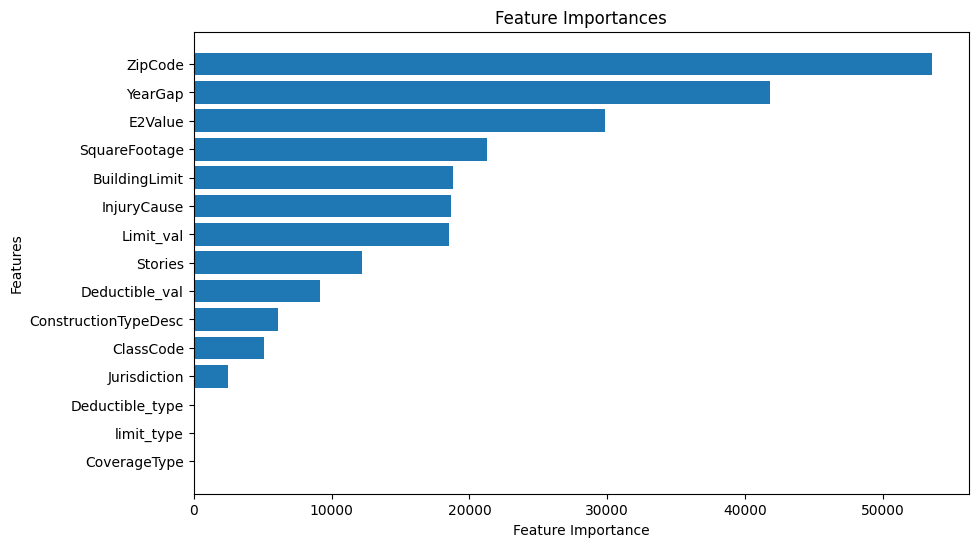

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**KFold Cross Validation**

**LightGBM**

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [ ]:
num_folds = 8
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
y_pred = np.zeros(len(X_train))

In [ ]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
    'verbosity': 100,
}

In [ ]:
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
    valid_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

In [ ]:
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=1000)
y_pred = model.predict(X_val_fold)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.670455
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.113636
[LightGBM] [Debug] init for col-wise cost 0.126514 seconds, init for row-wise cost 0.062484 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 12
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM]

In [ ]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

54015.71315550723

In [ ]:
R2= r2_score(y_val_fold, y_pred)
R2

In [ ]:
for train_idx, val_idx in kf.split(X_train):
    X1_train_fold, X1_val_fold = X1_train.iloc[train_idx], X1_train.iloc[val_idx]
    y1_train_fold, y1_val_fold = y1_train.iloc[train_idx], y1_train.iloc[val_idx]
    train_data = lgb.Dataset(X1_train_fold, label=y1_train_fold)
    valid_data = lgb.Dataset(X1_val_fold, label=y1_val_fold, reference=train_data)

In [ ]:
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=1000)
y1_pred = model.predict(X1_val_fold)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Debug] Re-bagging, using 68 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

15148.816827286817

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.7219199010382116

**CATBoost**

In [ ]:
cbr.fit(X_train_fold, y_train_fold)
y_pred = cbr.predict(X_val_fold)
y_pred

array([20830.18680747, 22958.79221199, 26970.91805963, 20575.17999741,
       19223.51623609, 22761.14919636, 32250.79219776, 28544.37177511,
       20721.78217705, 25384.58296368, 33499.00541337, 25085.47123377])

In [ ]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

54669.45973989133

In [ ]:
R2= r2_score(y_val_fold, y_pred)
R2

0.008145229759839223

In [ ]:
cbr.fit(X1_train_fold, y1_train_fold)
y1_pred = cbr.predict(X1_val_fold)
y1_pred

array([21277.07782113, 19165.48161716, 34514.3303363 , 18700.73880252,
       18370.49662898, 19346.16738178, 19165.48161716, 21629.07864188,
       21992.3278065 , 21160.34160618, 18700.73880252, 22903.74448072])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

25052.712741276537

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.2394601089612286

**XGBoost**

In [ ]:
xgr = XGBRegressor()
xgr.fit(X_train_fold, y_train_fold)
y_pred = xgr.predict(X_val_fold)
y_pred

array([ 7112.374 , 68434.664 ,  3508.0454,   745.1995,  4268.767 ,
        4136.0063,  5190.35  , 17473.184 , 14624.806 , 19183.049 ,
        1713.2692,  9535.701 ], dtype=float32)

In [ ]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

64040.91026512391

In [ ]:
R2= r2_score(y_val_fold, y_pred)
R2

-0.3610482288601582

In [ ]:
xgr = XGBRegressor()
xgr.fit(X1_train_fold, y1_train_fold)
y1_pred = xgr.predict(X1_val_fold)
y1_pred

array([   374.99255,  13396.631  , 113430.234  ,  24223.465  ,
         9430.249  ,   4954.682  ,  13396.631  ,  24382.838  ,
         9858.764  ,  43907.637  ,  24223.465  ,  17492.068  ],
      dtype=float32)

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

11862.19348078441

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.8294928923288718

**Random Forest**

In [ ]:
rf_model.fit(X_train_fold, y_train_fold)
y_pred = rf_model.predict(X_val_fold)
y_pred

array([10445.0381    , 45544.98215   , 86350.8728    ,  3357.26898333,
       16028.17715   ,  4421.9692    , 79161.7064    , 65096.4811    ,
       15628.98986667, 16255.443925  ,  6266.84678333, 11985.604     ])

In [ ]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

50863.2849865869

In [ ]:
R2= r2_score(y_val_fold, y_pred)
R2

0.14144655896139657

In [ ]:
rf_model.fit(X1_train_fold, y1_train_fold)
y1_pred = rf_model.predict(X1_val_fold)
y1_pred

array([ 76652.9228,  13980.5697, 101368.4729,  18185.601 ,   6149.2879,
         9833.2925,  13980.5697,  25457.3504,  39291.734 ,  37418.2383,
        18185.601 ,  31720.1342])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

26240.785436716633

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.1656156667716141

**Feature Importance-KFold LightGBM-Extended df**

In [ ]:
feature_importances = model.feature_importance(importance_type='split')

In [ ]:
importance_df_extended = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df_extended = importance_df_extended.sort_values(by='Importance', ascending=True)

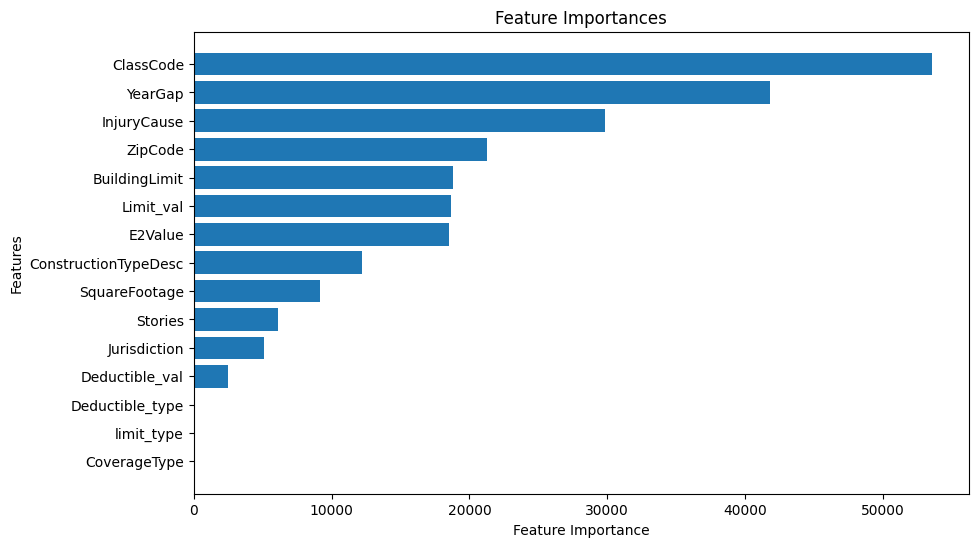

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df_extended['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**Ensemble method**

1. XGBoost-CatBoost

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('catboost', cbr)], weights=[0.5, 0.5])
ensemble.fit(X1_train_fold, y1_train_fold)
y1_pred = ensemble.predict(X1_val_fold)
y1_pred

array([10826.03518742, 16281.05623827, 73972.28235565, 21462.10182313,
       13900.37282621, 12150.42475534, 16281.05623827, 23005.95826625,
       15925.54573919, 32533.98916247, 21462.10182313, 20197.90642005])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

14902.215101818487

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.7308997282807964

**2. XGboost-lightgbm**

In [ ]:
lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('lightgbm', lgb)], weights=[0.5, 0.5])
ensemble.fit(X1_train_fold, y1_train_fold)
y1_pred = ensemble.predict(X1_val_fold)
y1_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 12
[LightGBM] [Info] Start training from score 24395.012405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

array([  4504.43750958,   8048.89662176, 110788.49575248,  18138.58729415,
         8988.10878936,    446.8620141 ,   8048.89662176,  28097.61015228,
        20862.34933371,  38495.33739983,  18138.58729415,  31896.00654163])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

12408.600494158947

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.8134230087867198

**3. LightGBM-CatBoost**

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 12
[LightGBM] [Info] Start training from score 24395.012405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

array([14955.48014329, 10933.32200065, 71330.54373313, 15377.22427353,
       13458.23259214,  7642.60464054, 10933.32200065, 26720.73052791,
       26929.13140102, 27121.68984355, 15377.22427353, 34601.8446023 ])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

16782.611289187123

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.658703721927429

**CatBoost-LightGBM-XgBoost Ensembled KFold**

In [ ]:
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('catboost', cbr), ('lightgbm', lgb)], weights=[0.3, 0.3, 0.4])
ensemble.fit(X1_train_fold, y1_train_fold)
y1_pred = ensemble.predict(X1_val_fold)
y1_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 12
[LightGBM] [Info] Start training from score 24395.012405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

array([ 9949.17409863, 10849.09869662, 87642.07226537, 17698.7449917 ,
       11758.61111784,  5665.87161293, 10849.09869662, 26528.52792533,
       22301.70144173, 32753.60872984, 17698.7449917 , 30638.72174158])

In [ ]:
mse = mean_squared_error(y1_val_fold, y1_pred)
rmse = np.sqrt(mse)
rmse

13272.884729823272

In [ ]:
R2= r2_score(y1_val_fold, y1_pred)
R2

0.7865269151064218

**Feature Importance- XGBoost-LightGBM**

In [ ]:
xgb_feature_importances = xgr.feature_importances_
lightgbm_feature_importances = model.feature_importance()

In [ ]:
weight_xgb = 0.6
weight_lightgbm = 0.4
ensemble_feature_importances = (weight_xgb * xgb_feature_importances + weight_lightgbm * lightgbm_feature_importances) / (weight_xgb + weight_lightgbm)

In [ ]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': ensemble_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

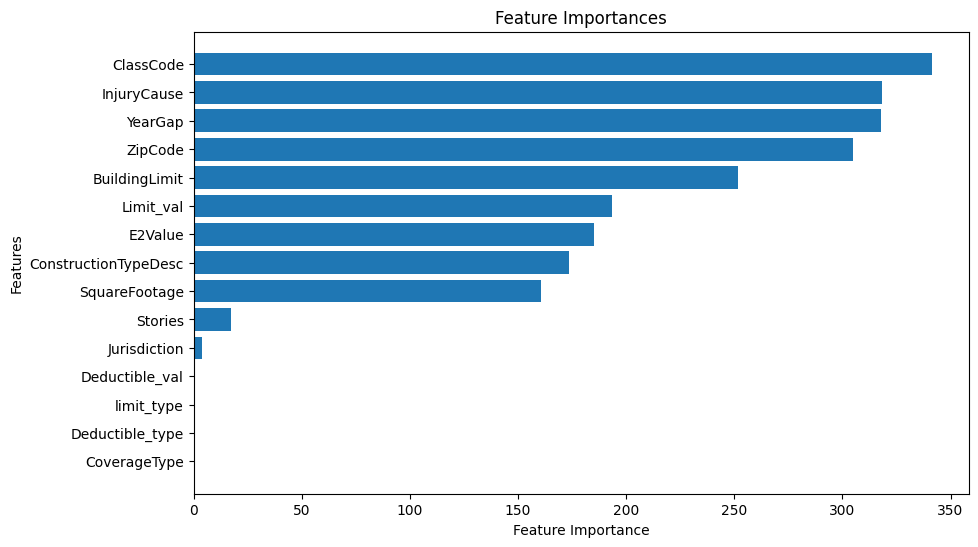

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**Model Comparision**

In [ ]:
import matplotlib.pyplot as plt

# Names of the ensembled models
models = [
    'XgBoost-CatBoost Kfold Ensembled',
    'XgBoost-LightGBM Kfold Ensembled',
    'CatBoost -LightGBM Kfold Ensembled',
    'XgBoost-CatBoost-LightGBM Kfold Ensembled'
]

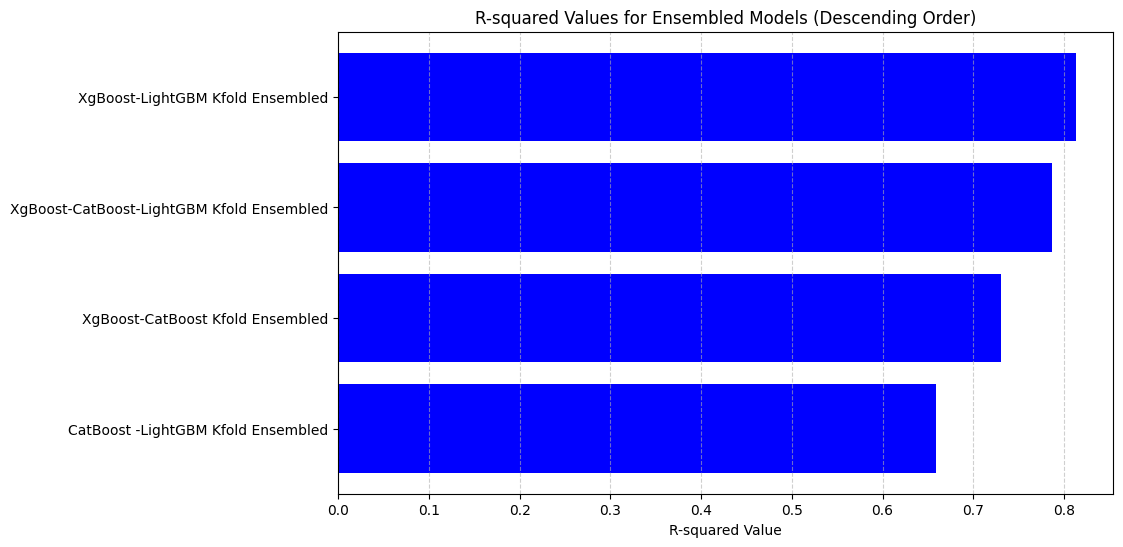

In [ ]:
r_squared = [
    0.7308997282807964,
    0.8134230087867198,
    0.658703721927429,
    0.7865269151064218
]
sorted_models, sorted_r_squared = zip(*sorted(zip(models, r_squared), key=lambda x: x[1], reverse=False))

plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_r_squared, color='blue')
plt.xlabel('R-squared Value')
plt.title('R-squared Values for Ensembled Models (Descending Order)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [270]:
models = [
    "Linear Regression - Single Run",
    "Random Forest - Single Run",
    "Random Forest - Kfold Cross Validation",
    "XGBoost - Single Run",
    "XGBoost - Kfold Cross Validation",
    "XGBoost - Ensembled with CatBoost",
    "XGBoost - Ensembled with LightGBM",
    "XGBoost - Ensembled with CatBoost and LightGBM",
    "LightGBM - Single Run",
    "LightGBM - Kfold Cross Validation",
    "LightGBM - Ensembled with CatBoost",
    "CatBoost - Single Run",
    "CatBoost - Kfold Cross Validation"
]

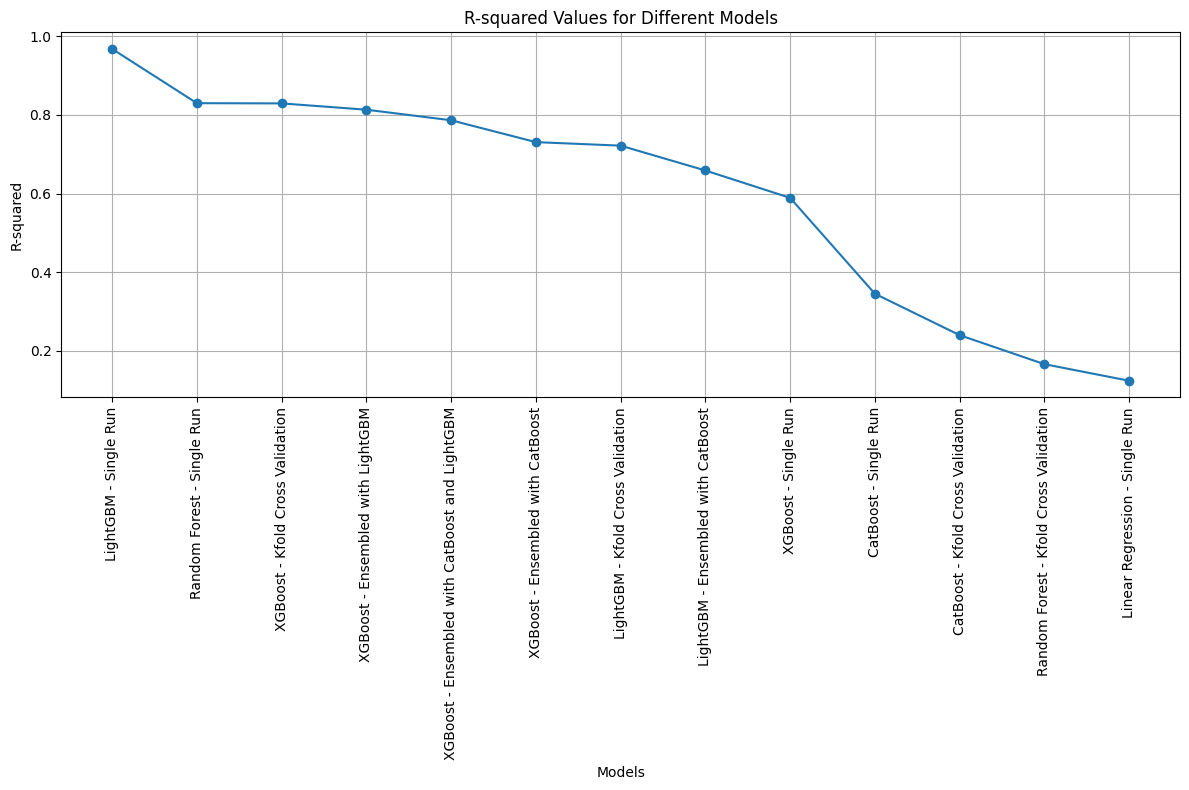

In [271]:
r_squared = [
    0.12339848473258219,
    0.8300400565894471,
    0.1656156667716141,
    0.58898281273811,
    0.8294928923288718,
    0.7308997282807964,
    0.8134230087867198,
    0.7865269151064218,
    0.9681581276857694,
    0.7219199010382116,
    0.658703721927429,
    0.3448754744029583,
    0.2394601089612286
]

sorted_data = sorted(zip(models, r_squared), key=lambda x: x[1], reverse=True)
sorted_models, sorted_r_squared = zip(*sorted_data)

# Create the line graph
plt.figure(figsize=(12, 8))
plt.plot(sorted_models, sorted_r_squared, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Values for Different Models')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()